In [13]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
def loaddata():
    data = np.loadtxt('data.txt',delimiter=',')
    n = data.shape[1]-1
    X =data[:,0:n]
    y = data[:,-1].reshape(-1,1)
    return X,y

In [15]:
def computecost(X,y,theta):
    m = X.shape[0]
    return np.sum(np.power(np.dot(X,theta)-y,2))/(2*m)
    
    

In [16]:
def featurenormalize(X):
    mu = np.average(X,axis = 0)
    sigma = np.std(X,axis = 0,ddof=1)
    X = (X-mu)/sigma
    return X,mu,sigma

In [17]:
def gradientdescent(X,y,theta,iterations,alpha):
    c = np.ones(X.shape[0]).transpose()
    X = np.insert(X,0,values=c,axis=1)
    m = X.shape[0]
    n = X.shape[1]
    costs=np.zeros(iterations)
    for num in range(iterations):
        for j in range(n):
            theta[j] = theta[j]+(alpha/m)*(np.sum(y-np.dot(X,theta)*X[:,j].reshape(-1,1)))
        costs[num]=computecost(X,y,theta)
    return theta,costs


In [18]:
def predict(X):
    X = (X-mu)/sigma
    c = np.ones(X.shape[0]).transpose()
    X = np.insert(X,0,values = c ,axis = 1)
    return np.dot(X,theta)

In [19]:
X,y=loaddata()
X,mu,sigma = featurenormalize(X)
theta = np.zeros(X.shape[1]+1).reshape(-1,1)
iterations = 100
alpha = 0.01
theta,costs = gradientdescent(X,y,theta,iterations,alpha)

~~print(theta)~~

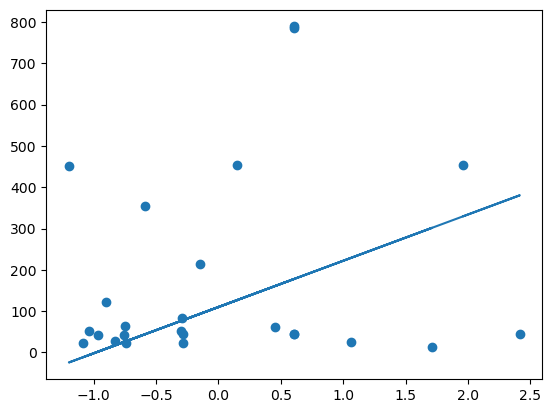

In [20]:
plt.scatter(X,y)
h_theta=theta[0]+theta[1]*X
plt.plot(X,h_theta)

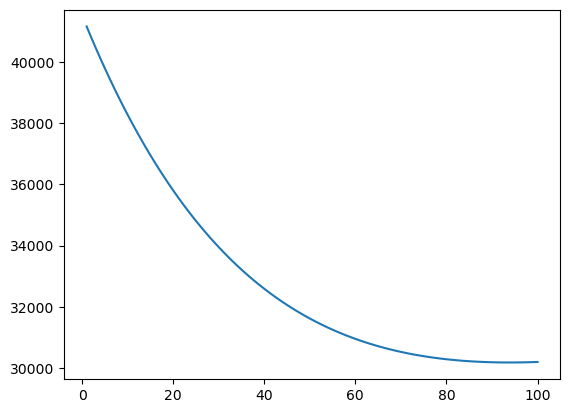

In [22]:
x_axis=np.linspace(1,iterations,iterations)
plt.plot(x_axis,costs[0:iterations])

In [11]:
print(predict([[8.924]]))

[[368.13702572]]
